In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#reading data points of Spect_a
pts = np.zeros((1,2))
i=0
with open(r'SpectData.txt') as file:
    for readline in file:
        line_strip = readline.strip()
        point = line_strip.split('\t')

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data=pts.astype(float)

df = DataFrame(data)
df

,0,1
0,9.8323,-0.174900
1,9.7920,-0.045816
2,10.5350,0.704350
3,10.2160,-0.387120
4,9.9026,0.388190
...,...,...
2079,11.2000,0.060000
2080,11.2000,0.070000
2081,11.2000,0.080000
2082,11.2000,0.090000


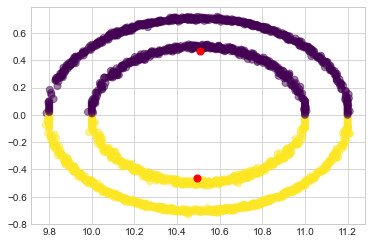

In [3]:
#K Means clustering and visualization for Spect_a data
kmeans = KMeans(n_clusters=2).fit(df)
plt.scatter(df[0], df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

plt.show()
# plt.savefig('Kmeans.jpg')

In [4]:
# Getting the labels of the clusters for Spect_a data
mean = data.mean(axis=0)
labels = np.zeros(2084)
i = 0
for x in data:
    if np.linalg.norm(mean - x) < 0.6:
        labels[i] = 1
    else:
        labels[i] = 2
    i = i + 1

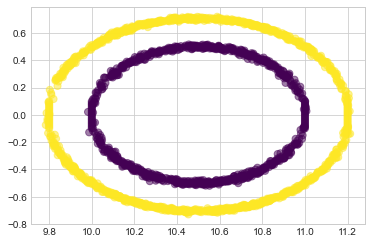

In [5]:
plt.scatter(df[0], df[1], c= labels.astype(float), s=50, alpha=0.5,cmap='viridis')

In [6]:
#Spect_a clustering
clustering_accuracy = D = np.zeros(100)
sigmas = np.arange(0.01, 1.01, 0.01)
z = 0

for a in sigmas:
    # Computing W
    W = np.zeros((2084,2084))
    i = 0
    for x in data:
        j = 0
        for x2 in data:
            if i != j:
                W[i][j] = np.exp(- (np.linalg.norm(x-x2))**2 / (2 * (a ** 2)))
            j = j+1
        i = i+1

    # Computing D
    D = np.zeros((2084,2084))
    i = 0
    for x in data:
        j = 0
        for x2 in data:
            if i == j:
                D[i][j] = np.sum(W[i])
            j = j+1
        i = i+1

    # Computing L
    L = D-W

    #Eigen decomposition of L
    eigenValues, eigenVectors = np.linalg.eigh(L)
    EV = eigenVectors[:,1:2]

    #Clustering Predictions
    predictions = np.zeros(2084)
    for i in range (2084):
        if EV[i] < 0:
            predictions[i] = 1
        else:
            predictions[i] = 2

    #Accuracy
    correct = 0
    for i in range(2084):
        if predictions[i] == labels[i]:
            correct += 1
    clustering_accuracy[z] = (correct / 2084)
    
    z = z+1

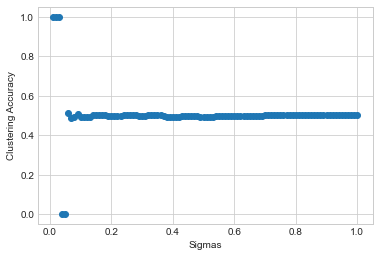

In [7]:
#Spect_a visualization
plt.scatter(sigmas, clustering_accuracy)

plt.xlabel('Sigmas')
plt.ylabel('Clustering Accuracy')

plt.show()
# plt.savefig('Spect_a.jpg')